In [1]:
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate
from dotenv import load_dotenv

import matplotlib.pyplot as plt

import os

load_dotenv()
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

llm_model=ChatGroq(model='llama-3.1-8b-instant', temperature=0)

Status: Optimal
Optimal Production:
Product A = 20.0 units
Product B = 20.0 units
Total Profit = $2400.0


In [14]:
user_input = """
Maximize profit where:
- Product A (x) gives \$50 profit, Product B (y) gives \$70.
- Constraints:
  - Machine M1: 2x + 3y <= 100 hours
  - Machine M2: x + 2y <= 80 hours
  - Machine M3: 4x + 2y <= 120 hours
"""

In [21]:
prompt = ChatPromptTemplate.from_template('''
    Convert the following linear programming problem description into structured JSON format:
    
    USER INPUT: "{user_input}"
    
    OUTPUT FORMAT:
    {{
      "objective": "maximize/minimize",
      "objective_function": "expression",
      "variables": ["x", "y", ...],
      "constraints": [
        {{"expression": "2x + 3y <= 100", "description": "Machine M1 time"}},
        ...
      ]
    }}
''')

In [24]:
chain=prompt|llm_model
structured_output = chain.invoke({
    #"expression": "2x + 3y <= 100",  # Add this missing variable
    "user_input": user_input
})
print("Structured Output:\n", structured_output.content)

Structured Output:
 Here's the conversion of the linear programming problem description into structured JSON format:

```json
{
  "objective": "maximize",
  "objective_function": "50x + 70y",
  "variables": ["x", "y"],
  "constraints": [
    {
      "expression": "2x + 3y <= 100",
      "description": "Machine M1 time"
    },
    {
      "expression": "x + 2y <= 80",
      "description": "Machine M2 time"
    },
    {
      "expression": "4x + 2y <= 120",
      "description": "Machine M3 time"
    }
  ]
}
```

Note that I've also added the objective function expression, which is a linear combination of the variables x and y with coefficients 50 and 70, respectively.


In [18]:
print(chain)

first=ChatPromptTemplate(input_variables=['"expression"', 'user_input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['"expression"', 'user_input'], input_types={}, partial_variables={}, template='\n    Convert the following linear programming problem description into structured JSON format:\n    \n    USER INPUT: "{user_input}"\n    \n    OUTPUT FORMAT:\n    {{\n      "objective": "maximize/minimize",\n      "objective_function": "expression",\n      "variables": ["x", "y", ...],\n      "constraints": [\n        {"expression": "2x + 3y <= 100", "description": "Machine M1 time"},\n        ...\n      ]\n    }}'), additional_kwargs={})]) middle=[] last=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001CBB26A7100>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001CBB26DD540>, model_name='llama-3.1-8b-instant', temperature=1e-08, model_kwargs={}, groq_api_key=Se

In [19]:
print("Input schema:", chain.input_schema.schema())



Input schema: {'properties': {'"expression"': {'title': '"Expression"', 'type': 'string'}, 'user_input': {'title': 'User Input', 'type': 'string'}}, 'required': ['"expression"', 'user_input'], 'title': 'PromptInput', 'type': 'object'}


C:\Users\shukl\AppData\Local\Temp\ipykernel_28824\3331722754.py:1: PydanticDeprecatedSince20: The `schema` method is deprecated; use `model_json_schema` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print("Input schema:", chain.input_schema.schema())


In [20]:
print("Output schema:", chain.output_schema.schema())

Output schema: {'$defs': {'AIMessage': {'additionalProperties': True, 'description': 'Message from an AI.\n\nAIMessage is returned from a chat model as a response to a prompt.\n\nThis message represents the output of the model and consists of both\nthe raw output as returned by the model together standardized fields\n(e.g., tool calls, usage metadata) added by the LangChain framework.', 'properties': {'content': {'anyOf': [{'type': 'string'}, {'items': {'anyOf': [{'type': 'string'}, {'additionalProperties': True, 'type': 'object'}]}, 'type': 'array'}], 'title': 'Content'}, 'additional_kwargs': {'additionalProperties': True, 'title': 'Additional Kwargs', 'type': 'object'}, 'response_metadata': {'additionalProperties': True, 'title': 'Response Metadata', 'type': 'object'}, 'type': {'const': 'ai', 'default': 'ai', 'title': 'Type', 'type': 'string'}, 'name': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'title': 'Name'}, 'id': {'anyOf': [{'type': 'string'}, {'type': 'n

In [25]:
from pulp import *

# Initialize the problem
prob = LpProblem("Production_Planning", LpMaximize)

# Define decision variables
x_A = LpVariable("Product_A", lowBound=0, cat='Integer')
x_B = LpVariable("Product_B", lowBound=0, cat='Integer')

# Objective function
prob += 50 * x_A + 70 * x_B, "Total_Profit"

# Constraints
prob += 2 * x_A + 3 * x_B <= 100, "Machine_M1_Time"
prob += x_A + 2 * x_B <= 80, "Machine_M2_Time"
prob += 4 * x_A + 2 * x_B <= 120, "Machine_M3_Time"

# Solve the problem
prob.solve()

# Print results
print("Status:", LpStatus[prob.status])
print("Optimal Production:")
print(f"Product A = {x_A.varValue} units")
print(f"Product B = {x_B.varValue} units")
print(f"Total Profit = ${value(prob.objective)}")

Status: Optimal
Optimal Production:
Product A = 20.0 units
Product B = 20.0 units
Total Profit = $2400.0


In [31]:
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate
from dotenv import load_dotenv
import json
import re
import matplotlib.pyplot as plt

import os

load_dotenv()
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

llm_model=ChatGroq(model='llama-3.1-8b-instant', temperature=0)

user_input = """
Maximize profit where:
- Product A (x) gives \$50 profit, Product B (y) gives \$70.
- Constraints:
  - Machine M1: 2x + 3y <= 100 hours
  - Machine M2: x + 2y <= 80 hours
  - Machine M3: 4x + 2y <= 120 hours
"""

prompt = ChatPromptTemplate.from_template('''
    Convert the following linear programming problem description into structured JSON format:
    
    USER INPUT: "{user_input}"
    
    OUTPUT FORMAT:
    {{
      "objective": "maximize/minimize",
      "objective_function": "expression",
      "variables": ["x", "y", ...],
      "constraints": [
        {{"expression": "2x + 3y <= 100", "description": "Machine M1 time"}},
        ...
      ]
    }}
''')


chain=prompt|llm_model
structured_output = chain.invoke({
    #"expression": "2x + 3y <= 100",  # Add this missing variable
    "user_input": user_input
})
print("Structured Output:\n", structured_output.content)

Structured Output:
 Here's the conversion of the linear programming problem description into structured JSON format:

```json
{
  "objective": "maximize",
  "objective_function": "50x + 70y",
  "variables": ["x", "y"],
  "constraints": [
    {
      "expression": "2x + 3y <= 100",
      "description": "Machine M1 time"
    },
    {
      "expression": "x + 2y <= 80",
      "description": "Machine M2 time"
    },
    {
      "expression": "4x + 2y <= 120",
      "description": "Machine M3 time"
    }
  ]
}
```

Note that I've also added the objective function expression, which is a linear combination of the variables x and y with coefficients 50 and 70, respectively.


In [41]:
problem_data = json.loads(structured_output.content)
print("\nParsed Problem Data:")
print(problem_data)

if problem_data:
    # Initialize the problem
    prob = LpProblem("Production_Problem", 
                    LpMaximize if problem_data["objective"] == "maximize" else LpMinimize)
    
    # Create variables
    variables = {}
    for var in problem_data["variables"]:
        variables[var] = LpVariable(var, lowBound=0)
    
    # Create objective function
    obj_expr = problem_data["objective_function"]
    for var in variables:
        obj_expr = obj_expr.replace(var, f"variables['{var}']")
    prob += eval(obj_expr), "Objective_Function"
    
    # Add constraints
    for idx, constraint in enumerate(problem_data["constraints"]):
        constr_expr = constraint["expression"]
        for var in variables:
            constr_expr = constr_expr.replace(var, f"variables['{var}']")
        prob += eval(constr_expr), f"Constraint_{idx+1}"
    
    # Solve the problem
    prob.solve()
    
    # Step 9: Display results
    print("\n=== Solution ===")
    print("Status:", LpStatus[prob.status])
    print("Objective Value:", value(prob.objective))
    print("Variable Values:")
    for var in variables:
        print(f"{var}: {value(variables[var])}")
    
    # Step 10: Print constraints status
    print("\nConstraints:")
    for name, constraint in prob.constraints.items():
        print(f"{name}: {constraint.value()} (slack: {-constraint.slack})")
else:
    print("Could not proceed due to JSON parsing error")


Parsed Problem Data:
{'objective': 'maximize', 'objective_function': '50*x + 70*y', 'variables': ['x', 'y'], 'constraints': [{'expression': '2*x + 3*y <= 100', 'description': 'Machine M1 time'}, {'expression': 'x + 2*y <= 80', 'description': 'Machine M2 time'}, {'expression': '4*x + 2*y <= 120', 'description': 'Machine M3 time'}]}

=== Solution ===
Status: Optimal
Objective Value: 2400.0
Variable Values:
x: 20.0
y: 20.0

Constraints:
Constraint_1: 0.0 (slack: 0.0)
Constraint_2: -20.0 (slack: -20.0)
Constraint_3: 0.0 (slack: 0.0)



=== SOLUTION ===


**Status:** Optimal

**Optimal Value:** $2400.00


**Production Plan:**


- x: 20.0 units

- y: 20.0 units


**Constraints Analysis:**


- Constraint 1: Used 0.0 of available resources | Slack: 0.0 | Binding

- Constraint 2: Used -20.0 of available resources | Slack: -20.0 | Non-binding

- Constraint 3: Used 0.0 of available resources | Slack: 0.0 | Binding


**Solution Visualization:**


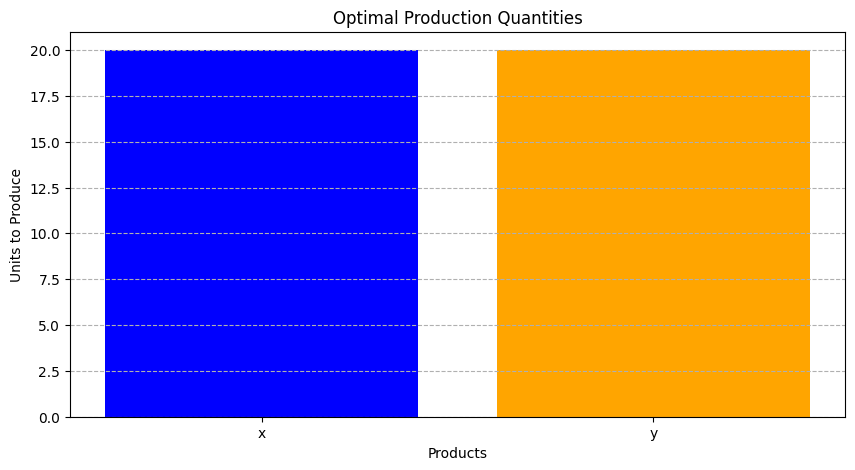

In [42]:
# [Previous imports and setup code remains the same until Step 9]

# Step 9: Display results with better formatting
from IPython.display import display, Markdown

print("\n=== SOLUTION ===")
display(Markdown(f"**Status:** {LpStatus[prob.status]}"))
display(Markdown(f"**Optimal Value:** ${value(prob.objective):.2f}"))

print("\n**Production Plan:**")
for var in variables:
    display(Markdown(f"- {var}: {value(variables[var]):.1f} units"))

print("\n**Constraints Analysis:**")
for name, constraint in prob.constraints.items():
    status = "Binding" if constraint.value() == 0 else "Non-binding"
    display(Markdown(
        f"- {name.replace('_', ' ')}: "
        f"Used {constraint.value():.1f} of available resources | "
        f"Slack: {-constraint.slack:.1f} | "
        f"{status}"
    ))


print("\n**Solution Visualization:**")
    
if len(variables) == 2:
    # Prepare data for plotting
    var_names = list(variables.keys())
    values = [value(variables[var]) for var in var_names]
    
    plt.figure(figsize=(10, 5))
    plt.bar(var_names, values, color=['blue', 'orange'])
    plt.title('Optimal Production Quantities')
    plt.ylabel('Units to Produce')
    plt.xlabel('Products')
    plt.grid(axis='y', linestyle='--')
    plt.show()
else:
    print("(Visualization available only for 2-variable problems)")


In [ ]:
# ##cplex code for above problem
# from docplex.mp.model import Model

# # Initialize the model
# model = Model(name="Production_Planning")

# # Define decision variables (Integer and >= 0)
# x_A = model.integer_var(name="Product_A", lb=0)
# x_B = model.integer_var(name="Product_B", lb=0)

# # Objective function: Maximize profit
# model.maximize(50 * x_A + 70 * x_B)

# # Constraints
# model.add_constraint(2 * x_A + 3 * x_B <= 100, "Machine_M1_Time")
# model.add_constraint(x_A + 2 * x_B <= 80, "Machine_M2_Time")
# model.add_constraint(4 * x_A + 2 * x_B <= 120, "Machine_M3_Time")

# # Solve the model
# solution = model.solve()

# # Print results
# if solution:
#     print("Status:", model.solve_details.status)
#     print("Optimal Production:")
#     print(f"Product A = {x_A.solution_value} units")
#     print(f"Product B = {x_B.solution_value} units")
#     print(f"Total Profit = ${model.objective_value}")
# else:
#     print("No feasible solution found.")

DOcplexException: Cannot solve model: no CPLEX runtime found.

In [51]:
from docplex.mp.model import Model
print("docplex is installed successfully!")

ModuleNotFoundError: No module named 'docplex'